# Pandas (Python) 笔记

Python Data Analysis Library 或 pandas 是基于NumPy 的一种工具，该工具是为了解决数据分析任务而创建的。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的工具。pandas提供了大量能使我们快速便捷地处理数据的函数和方法。你很快就会发现，它是使Python成为强大而高效的数据分析环境的重要因素之一。

Pandas 是python的一个数据分析包，最初由AQR Capital Management于2008年4月开发，并于2009年底开源出来，目前由专注于Python数据包开发的PyData开发team继续开发和维护，属于PyData项目的一部分。Pandas最初被作为金融数据分析工具而开发出来，因此，pandas为时间序列分析提供了很好的支持。 Pandas的名称来自于面板数据（panel data）和python数据分析（data analysis）。panel data是经济学中关于多维数据集的一个术语，在Pandas中也提供了panel的数据类型。

参考：
- https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/
- https://towardsdatascience.com/data-pre-processing-techniques-you-should-know-8954662716d6#:~:text=What%20is%20Data%20Preprocessing%3F,That%20would%20cause%20certain%20errors.

---

## 数据处理原则

数据预处理涉及的步骤：

**1. 数据清洗：**
数据可能有许多不相关和缺失的部分。为了处理这部分，完成了数据清理。它涉及处理丢失的数据、噪声数据等。
 

    1. 存在缺失数据：
    当数据中缺少某些数据时，就会出现这种情况。它可以以下述方式处理：
    
    - 填写缺失值：有多种方法可以完成此任务。通常可以选择通过变量的均值或最可能的值，来手动填充缺失值。
 
    2. 数据嘈杂、有干扰项或者没有意义的极端情况：
    噪声数据是机器无法解释的无意义数据。它可能由于数据收集错误、数据输入错误等原因产生。它可以通过以下方式处理：
    
    - 装箱方法：此方法适用于已排序的数据以使其平滑。将整个数据分成大小相等的段，然后执行各种方法来完成任务。每个分段单独处理。可以用其平均值或边界值替换段中的所有数据来完成任务。
 
    - 回归：这里的数据可以通过拟合回归函数来使其平滑。使用的回归可以是线性的（有一个自变量）或多重的（有多个自变量）。
 
    - 聚类：这种方法将相似的数据分组到一个集群中。异常值可能未被检测到，或者它会落在集群之外。
    
**2. 数据转换：**
采取此步骤是为了将数据转换为适合挖掘过程的适当形式。这涉及到以下几种方式：

    1. 正常化：
    这样做是为了使数据值落入指定范围（-1.0 到 1.0 或 0.0 到 1.0）内
 
    2. 特征生成：
    在该策略中，基于已有的变量，构建新的特征变量，以挖掘数据之间的联系。
 
    3. 离散化：
    这样做是为了用区间级别或概念级别替换数字属性的原始值。
 
    4. 概念层次生成：
    在这里，属性在层次结构中从较低级别转换为较高级别。例如“city”可以转换为“country”。
    
**3. 数据缩减：**
因为数据挖掘是一种用于处理大量数据的技术。在处理大量数据时，在这种情况下分析变得更加困难。为了摆脱这种情况，我们使用数据缩减技术。它旨在提高存储效率并降低数据存储和分析成本。数据缩减的各个步骤是：
 
    1. 变量子集选择：
    应该使用高度相关的变量，其余的都可以丢弃。为了进行变量选择，可以使用变量的显著性水平和p值：p值大于显著性水平的变量可以被丢弃。
 
    2. 数量减少：
    通过回归模型，找到最重要的几个变量，用作后面的分析。
 
    3. 降维：
    这通过编码机制减少了数据的大小。它可以是有损或无损的。如果从压缩数据重建后，可以恢复原始数据，则这种归约称为无损归约，否则称为有损归约。两种有效的降维方法是：小波变换和PCA（主成分分析）。

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.graph_objects as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Make this notebook reproducible
np.random.seed(11)

## 基本读写

### 加载数据，并将两个dataframe合并

In [74]:
# Read the dataset
data1 = pd.read_csv('sample_data/ew_meter1.csv')
data2 = pd.read_csv('sample_data/ew_meter2.csv')
# Merge/Join two dataframes
data = pd.merge(data1, data2, left_on='time', right_on='time', how='left')

### 只保留特定列和行

In [23]:
# 保留时间和功率值（active_p）
data = data[["time", "activep_x", "activep_y"]]
# 选取前100行
data = data.iloc[:100]

### 快速查阅数据的基本信息

In [ ]:
# First 10 rows
print(data.head(10))

# Random 10 rows
print(data.sample(10))

# Basic description
print(data.describe(include='all'))
print(data.info())

# Check data types/columns
print(data.dtypes)
print(data.columns)

### 查阅数据统计后的指标

注：此部分数据来源不是电表

In [7]:
d = {'store_id': [1,1,2,2,3,3], 
     'day': [1,2,1,2,1,2], 
     'status': [0,1,1,0,1,1], 
     'revenue': [1,1,1,0,1,1]}
df = pd.DataFrame(data=d)

# Check daily summary
daily_summary = pd.DataFrame()
daily_summary['active'] = df[df['revenue'] > 0].groupby('day')['revenue'].count()
daily_summary['fraud'] = df[df['status'] == 0].groupby('day')['status'].count()
daily_summary['ratio'] = daily_summary['fraud'] / daily_summary['active']

daily_summary

,active,fraud,ratio
day,,,
1,3,1,0.333333
2,2,1,0.500000


### 查看数据的极端情况、重复值

注：此部分数据来源不是电表

In [19]:
# Remove outliers
df = df.sort_values(by=['day'], ascending=True)
df = df[df['day'] <= 3]
df = df[df['day'].isin([1, 2])]

# Check duplicates for unique values
print(len(df['store_id'].unique()) == len(df['store_id']))
# If not unique, remove duplicates（只保留最后一次出现的数据）
df = df.drop_duplicates(subset='store_id', keep='last')
df

True


,store_id,day,status,revenue
1,1,2,1,1
3,2,2,0,0
5,3,2,1,1


## 数据预处理

### 修改数据列的名字和index

In [24]:
# Rename the columns
print(data.columns.values)
data.columns = ['time', 'power_1', 'power_2']

# Set / reset index
data = data.reset_index(drop=True)
data = data.set_index('time')

['time' 'activep_x' 'activep_y']


### 查看数据是否有缺失、null的情况

In [27]:
# Check Null or missing values
print(data.isnull().sum())
data = data.replace('', np.nan)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

time       0
power_1    0
power_2    0
dtype: int64


### 数据缺失、null情况下的处理方式（进阶版） 

In [ ]:
### How prevalent is the missing data? remove if its too prevalent
### is it random, or does it have a pattern?
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

### For numerical, we can either impute with 0, or mean, or mode, or remove them
### For categorical, maybe drop or fill with N/A?
data['var'] = data['var'].fillna(data['var'].mean())
data['var'] = data.groupby('group')['var'].transform(lambda x: x.fillna(x.median()))
data['var'] = data['var'].fillna(0, inplace=True)
data['var'] = data['var'].fillna(data['var'].mode()[0])

### 查看数据的统计分布情况

注：交替使用作图的软件包

#### 直方图
在统计学中，直方图（英语：Histogram）是一种对数据分布情况的图形表示，是一种二维统计图表，它的两个坐标分别是统计样本和该样本对应的某个属性的度量，以长条图（bar）的形式具体表现。因为直方图的长度及宽度很适合用来表现数量上的变化，所以较容易解读差异小的数值。

In [44]:
# Histogram 直方图
fig = go.Figure(data=[go.Histogram(x=data["power_1"])])
fig.show()

#### 偏度
偏度（英语：skewness），亦称歪度，在概率论和统计学中衡量实数随机变量概率分布的不对称性。偏度的值可以为正，可以为负或者甚至是无法定义。在数量上，偏度为负（负偏态；左偏）就意味着在概率密度函数左侧的尾部比右侧的长，绝大多数的值（不一定包括中位数在内）位于平均值的右侧。偏度为正（正偏态；右偏）就意味着在概率密度函数右侧的尾部比左侧的长，绝大多数的值（不一定包括中位数）位于平均值的左侧。偏度为零就表示数值相对均匀地分布在平均值的两侧，但不一定意味着其为对称分布。

Skewness: -0.337064
Kurtosis: -1.471835


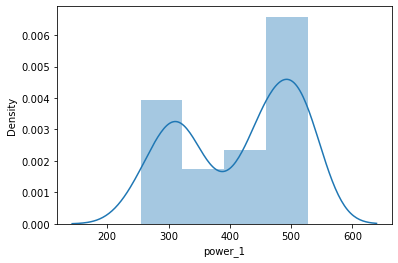

In [38]:
# check skewness of power_1
sns.distplot(data['power_1']);
print("Skewness: %f" % data['power_1'].skew())
print("Kurtosis: %f" % data['power_1'].kurt())

#### 相关性
相关（Correlation），又称为 相关性、关联，在概率论和统计学中，相关显示了两个或几个随机变量之间线性关系的强度和方向。

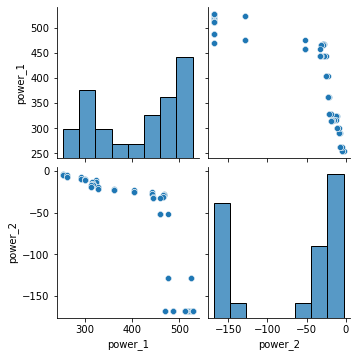

<AxesSubplot:>

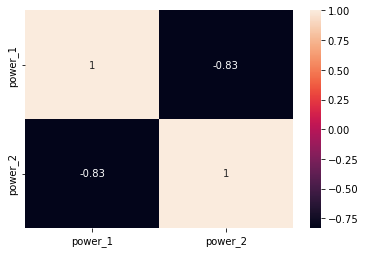

In [41]:
# Check correlation of variables, a broad view

# Scatter matrix 散点图
cols = ['power_1', 'power_2']
sns.pairplot(data[cols], size = 2.5)
plt.show()

# Heatmap 热图
sns.heatmap(data.corr(), annot=True)


## 进阶数据处理

### 与时间有关的处理 

In [62]:
import datetime as dt

# Add date and convert datetime from string to datetime
data["datetime"] = "2022/05/09" + " " + data["time"]
data["datetime"] = data["datetime"].apply(lambda x: 
                                          dt.datetime.strptime(x, '%Y/%m/%d %H:%M:%S'))

# Create an hour column
data["hour"] = data["datetime"].dt.hour

### 将数值变为类别

In [64]:
def set_rule(x, y):
    if x == 0 and y >= 300:
         return "高"
    else:
         return "正常"

data['power_1_类别'] = data.apply(lambda x: 
                                set_rule(x['hour'], x['power_1']), axis =  1)
data

,time,power_1,power_2,datetime,hour,power_1_类别
0,00:00:56,254.3,-3.1,2022-05-09 00:00:56,0,正常
1,00:01:02,254.3,-5.2,2022-05-09 00:01:02,0,正常
2,00:01:08,254.3,-5.2,2022-05-09 00:01:08,0,正常
3,00:01:14,254.3,-5.2,2022-05-09 00:01:14,0,正常
4,00:01:20,262.9,-5.2,2022-05-09 00:01:20,0,正常
...,...,...,...,...,...,...
95,00:10:29,486.9,-167.9,2022-05-09 00:10:29,0,高
96,00:10:35,486.9,-167.9,2022-05-09 00:10:35,0,高
97,00:10:41,486.9,-167.9,2022-05-09 00:10:41,0,高
98,00:10:47,469.3,-167.9,2022-05-09 00:10:47,0,高
